In [1]:
%pylab inline
from TB.c import *

Populating the interactive namespace from numpy and matplotlib
import pandas as pd
import numpy as np
import os, re

from os.path import isdir, isfile, basename, dirname

from glob import glob
from pathlib import Path as P
from tqdm.notebook import tqdm

import seaborn as sns



/home/swacker/miniconda3/envs/py3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
PATH = '/data/metabolomics_storage/QC-pipeline'

In [146]:
glob(f'{PATH}/**', recursive=False)

['/data/metabolomics_storage/QC-pipeline/example-01',
 '/data/metabolomics_storage/QC-pipeline/example-02',
 '/data/metabolomics_storage/QC-pipeline/LSARP-Full-May2020-Worklist.csv']

In [147]:
mode = 'Neg'
files = glob(f'{PATH}/**/*{mode}*Standard*mzXML', recursive=True)
files

['/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-5000nm.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm-AIF.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-1000nm.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-10nm.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50nm.mzXML',
 '/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/20

In [191]:
[ basename(fn) for fn in files]

['2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-5000nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm-AIF.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-1000nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-10nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-100nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-10000nm.mzXML',
 '2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-500nm.mzXML']

In [148]:
worklist = pd.read_csv('/data/metabolomics_storage/QC-pipeline/LSARP-Full-May2020-Worklist.csv', skiprows=1)
worklist

,Sample Type,File Name,Sample ID,Path,Instrument Method,Process Method,Calibration File,Position,Inj Vol,Level,...,Sample Vol,ISTD Amt,Dil Factor,L1 Study,L2 Client,L3 Laboratory,L4 Company,L5 Phone,Comment,Sample Name
0,Unknown,2020_04_20RG_HILICPos15S_Col001_LSARP_SA008_Bl...,NaN,F:\QEHF\LRG\LSARP\2020_04_20RG_SA008,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICP...,NaN,NaN,G:C11,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Unknown,2020_04_20RG_HILICNeg15S_Col002_LSARP_SA008_Bl...,NaN,F:\QEHF\LRG\LSARP\2020_04_20RG_SA008,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICN...,NaN,NaN,G:C11,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Unknown,2020_04_20RG_HILICPos15S_Col001_LSARP_SA008_Bl...,NaN,F:\QEHF\LRG\LSARP\2020_04_20RG_SA008,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICP...,NaN,NaN,G:C11,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Unknown,2020_04_20RG_HILICNeg15S_Col002_LSARP_SA008_Bl...,NaN,F:\QEHF\LRG\LSARP\2020_04_20RG_SA008,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICN...,NaN,NaN,G:C11,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unknown,2020_04_20RG_HILICPos15S_Col001_LSARP_SA008_Bl...,NaN,F:\QEHF\LRG\LSARP\2020_04_20RG_SA008,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICP...,NaN,NaN,G:C11,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3421,Unknown,2020_05_16RG_HILICNeg15S_Col002_MSMLS65,NaN,F:\QEHF\LRG\LSARP\Development\2020_05_16RG_LSA...,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICN...,NaN,NaN,B:B2,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3422,Unknown,2020_05_16RG_HILICPos15S_Col001_Blank_post6,NaN,F:\QEHF\LRG\LSARP\Development\2020_05_16RG_LSA...,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICP...,NaN,NaN,B:F9,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3423,Unknown,2020_05_16RG_HILICNeg15S_Col002_Blank_post6,NaN,F:\QEHF\LRG\LSARP\Development\2020_05_16RG_LSA...,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICN...,NaN,NaN,B:F9,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3424,Unknown,2020_05_16RG_HILICPos15S_Col001_Blank_post7,NaN,F:\QEHF\LRG\LSARP\Development\2020_05_16RG_LSA...,F:\QEHF\Methods\LSARP\2019_05_07RG_MultiHILICP...,NaN,NaN,B:F9,2,NaN,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
biomarkers = pd.read_csv('/data/metabolomics_storage/QC-pipeline/example-01/200717-sw__LSARP-known-biomarkers.csv')
biomarkers

,peak_label,chemical_formula,mz_mean_neg,rt_expected_neg,detected_neg,mz_mean_pos,rt_expected_pos,is_standard,monoisotopic_mass,refmet_name,pubchem_cid,refmet_mass,formula,inchi_key,super_class,main_class,sub_class,refmet_regno,Smiles
0,3-Methyladenine,C6H7N5,NaN,NaN,NaN,150.0775,5.08,True,149.070145,3-Methyladenine,1673,149.0701,C6H7N5,FSASIHFSFGAIJM-UHFFFAOYSA-N,Nucleic acids,Purines,6-aminopurines,41415,CN1C=NC(=C2C1=NC=N2)N
1,AMP,C10H14N5O7P,346.0558,8.25,D,348.0704,8.25,True,347.063084,AMP,6083,347.0631,C10H14N5O7P,UDMBCSSLTHHNCD-KQYNXXCUSA-N,Nucleic acids,Purines,Purine ribonucleoside monophosphates,37043,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)COP(=O)(O)O)O...
2,Adenine,C5H5N5,134.0472,4.57,D,136.0618,4.57,True,135.054495,Adenine,190,135.0545,C5H5N5,GFFGJBXGBJISGV-UHFFFAOYSA-N,Nucleic acids,Purines,6-aminopurines,37038,C1=NC2=NC=NC(=C2N1)N
3,Adenosine,C10H13N5O4,266.0895,4.20,D,268.1041,4.20,True,267.096754,Adenosine,60961,267.0968,C10H13N5O4,OIRDTQYFTABQOQ-KQYNXXCUSA-N,Nucleic acids,Purines,Purine ribonucleosides,37045,C1=NC(=C2C(=N1)N(C=N2)C3C(C(C(O3)CO)O)O)N
4,Agmatine,C5H14N4,NaN,NaN,NaN,131.1292,8.40,True,130.121846,Agmatine,199,130.1218,C5H14N4,QYPPJABKJHAVHS-UHFFFAOYSA-N,Organic nitrogen compounds,Organonitrogen compounds,Guanidines,37797,C(CCN=C(N)N)CN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,Uridine,C9H12N2O6,243.0623,3.27,D,245.0769,3.27,True,244.069536,Uridine,6029,244.0695,C9H12N2O6,DRTQHJPVMGBUCF-XVFCMESISA-N,Nucleic acids,Pyrimidines,Pyrimidine ribonucleosides,37190,C1=CN(C(=O)NC1=O)C2C(C(C(O2)CO)O)O
71,Urocanic acid,C6H6N2O2,137.0356,4.21,D,139.0502,4.21,True,138.042927,Urocanic acid,736715,138.0429,C6H6N2O2,LOIYMIARKYCTBW-OWOJBTEDSA-N,Organoheterocyclic compounds,Imidazoles,Imidazolyl carboxylic acids,37193,C1=C(NC=N1)C=CC(=O)O
72,Valine,C5H11NO2,116.0717,7.15,D,118.0863,7.15,True,117.078979,Valine,6287,117.0790,C5H11NO2,KZSNJWFQEVHDMF-BYPYZUCNSA-N,Organic acids,Amino acids and peptides,Amino acids,37484,CC(C)C(C(=O)O)N
73,Xanthine,C5H4N4O2,151.0262,3.65,D,153.0408,3.65,True,152.033425,Xanthine,1188,152.0334,C5H4N4O2,LRFVTYWOQMYALW-UHFFFAOYSA-N,Nucleic acids,Purines,Xanthines,37186,C1=NC2=C(N1)C(=O)NC(=O)N2


In [150]:
def peaklist_from_biomarkers(biomarkers, mode='neg', only_standards=True, mz_width=10, 
                             rt_min=0, rt_max=12, rt_delta=None):
    if only_standards:
        biomarkers = biomarkers[biomarkers.is_standard]
    peaklist = biomarkers.set_index('peak_label')[[f'mz_mean_{mode}', f'rt_expected_{mode}']]
    peaklist.columns = ['mz_mean', 'rt_expected']
    peaklist['mz_width'] = mz_width
    peaklist['intensity_threshold'] = 0
    if (rt_min is not None) and (rt_max is not None):
        peaklist['rt_min'] = rt_min
        peaklist['rt_max'] = rt_max
    elif rt_delta is not None:
        peaklist['rt_min'] = peaklist['rt_expected'] - (rt_delta / 2)
        peaklist['rt_max'] = peaklist['rt_expected'] - (rt_delta / 2)   
    peaklist['peaklist'] = f'from_biomarkers_{mode}'
    return peaklist.dropna().reset_index()

peaklist = peaklist_from_biomarkers(biomarkers)
peaklist

,peak_label,mz_mean,rt_expected,mz_width,intensity_threshold,rt_min,rt_max,peaklist
0,AMP,346.0558,8.25,10,0,0,12,from_biomarkers_neg
1,Adenine,134.0472,4.57,10,0,0,12,from_biomarkers_neg
2,Adenosine,266.0895,4.20,10,0,0,12,from_biomarkers_neg
3,Arginine,173.1044,8.35,10,0,0,12,from_biomarkers_neg
4,Asparagine,131.0462,7.96,10,0,0,12,from_biomarkers_neg
...,...,...,...,...,...,...,...,...
56,Uridine,243.0623,3.27,10,0,0,12,from_biomarkers_neg
57,Urocanic acid,137.0356,4.21,10,0,0,12,from_biomarkers_neg
58,Valine,116.0717,7.15,10,0,0,12,from_biomarkers_neg
59,Xanthine,151.0262,3.65,10,0,0,12,from_biomarkers_neg


In [151]:
from ms_mint.Mint import Mint

In [152]:
mint = Mint()

In [153]:
mint.peaklist = peaklist

In [154]:
mint.files = files

In [155]:
mint.run()

In [156]:
mint.crosstab('peak_rt_of_max')

ms_file,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-10000nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-1000nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-100nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-10nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm-AIF.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50000nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-5000nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-500nm.mzXML,/data/metabolomics_storage/QC-pipeline/example-01/2020_05_11RG_SA001_RPT001/2020_05_11RG_HILICNeg15S_Col002_LSARP_SA001_RPT001_Standard-50nm.mzXML
peak_label,,,,,,,,,
AMP,8.305933,8.314617,0.000000,1.492810,0.000000,8.305967,8.314617,6.533467,6.464300
Adenine,4.674550,4.665950,4.665950,4.665950,0.005544,4.657283,4.665950,4.665900,4.657250
Adenosine,5.184667,5.176067,5.202000,5.271183,0.000000,5.176067,5.193367,5.184667,5.201967
Arginine,8.357800,8.357850,8.513483,0.000000,0.000000,8.357850,8.357850,8.357817,8.357817
Asparagine,7.977367,7.977417,6.222250,8.098467,0.000000,7.968767,7.977417,7.968733,8.150300
...,...,...,...,...,...,...,...,...,...
Uridine,3.256567,3.273917,3.273917,3.247983,0.000000,3.247967,3.291200,3.308467,3.265217
Urocanic acid,4.233583,4.225000,4.233633,4.233650,0.005544,4.224983,4.242283,4.242250,4.233600
Valine,7.164633,5.080967,6.741017,7.328967,0.000000,7.190617,6.576750,6.455650,7.052233


In [157]:
mint.results.columns


Index(['peak_label', 'ms_file', 'peak_area', 'peak_n_datapoints', 'peak_max',
       'peak_min', 'peak_median', 'peak_mean', 'peak_int_first',
       'peak_int_last', 'peak_delta_int', 'peak_rt_of_max', 'file_size',
       'intensity_sum', 'ms_path', 'peaklist', 'mz_mean', 'mz_width', 'rt_min',
       'rt_max', 'intensity_threshold', 'peak_shape'],
      dtype='object')

In [158]:
peaklist.set_index('peak_label')['rt_expected']

peak_label
AMP              8.25
Adenine          4.57
Adenosine        4.20
Arginine         8.35
Asparagine       7.96
                 ... 
Uridine          3.27
Urocanic acid    4.21
Valine           7.15
Xanthine         3.65
Xanthosine       4.88
Name: rt_expected, Length: 61, dtype: float64

In [159]:
peaklist.set_index('peak_label')['rt_expected']

peak_label
AMP              8.25
Adenine          4.57
Adenosine        4.20
Arginine         8.35
Asparagine       7.96
                 ... 
Uridine          3.27
Urocanic acid    4.21
Valine           7.15
Xanthine         3.65
Xanthosine       4.88
Name: rt_expected, Length: 61, dtype: float64

In [160]:
mask = (mint.crosstab() > 0).values

In [161]:
delta_rt = mint.crosstab('peak_rt_of_max').add(-peaklist.set_index('peak_label')['rt_expected'], axis=0)

In [162]:
delta_rt.columns = [basename(i) for i in delta_rt.columns]

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52, 53, 54, 55, 56, 57, 58, 59, 60, 61]),
 <a list of 61 Text xticklabel objects>)

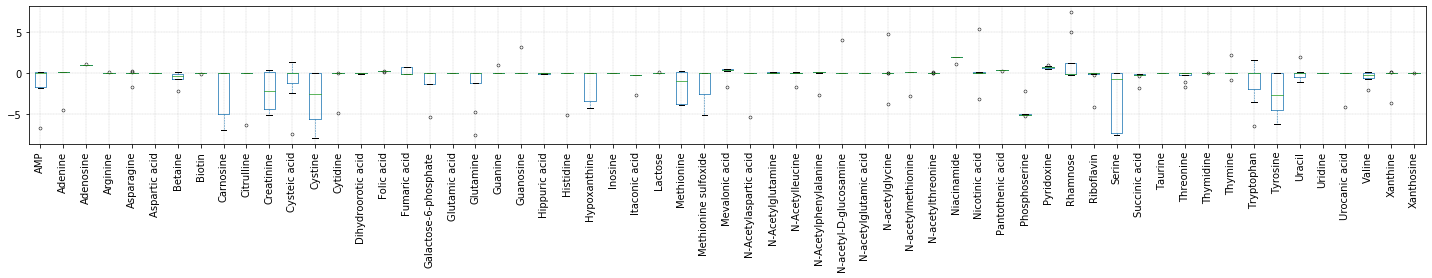

In [190]:
figure(figsize=(20,4))
_ = delta_rt.where(mask).T.boxplot(ax=gca())
xticks(rotation=90)

In [167]:
tmp = mint.results[(mint.results.peak_area>0) & (mint.results.peak_n_datapoints > 100)]

In [168]:
tmp = pd.merge(tmp, peaklist[['peak_label', 'rt_expected', 'dete']], on='peak_label')

In [177]:
tmp['log_peak_area'] = tmp.peak_area.apply(np.log1p)

In [179]:
tmp.columns

Index(['peak_label', 'ms_file', 'peak_area', 'peak_n_datapoints', 'peak_max',
       'peak_min', 'peak_median', 'peak_mean', 'peak_int_first',
       'peak_int_last', 'peak_delta_int', 'peak_rt_of_max', 'file_size',
       'intensity_sum', 'ms_path', 'peaklist', 'mz_mean', 'mz_width', 'rt_min',
       'rt_max', 'intensity_threshold', 'peak_shape', 'rt_expected',
       'log_peak_area'],
      dtype='object')

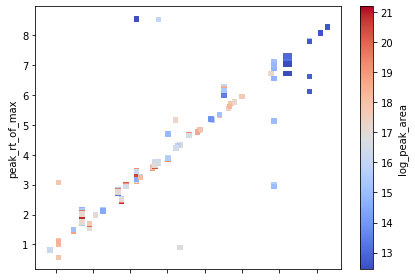

In [183]:
tmp.plot.scatter(x='rt_expected', y='peak_rt_of_max', c='log_peak_area', cmap=cm.coolwarm)

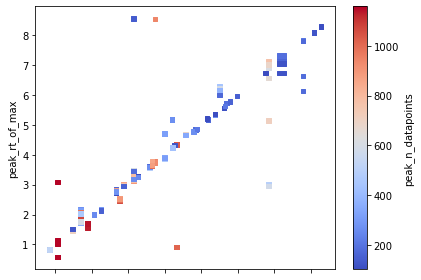

In [181]:
tmp.plot.scatter(x='rt_expected', y='peak_rt_of_max', c='peak_n_datapoints', cmap=cm.coolwarm)

In [170]:
tmp

,peak_label,ms_file,peak_area,peak_n_datapoints,peak_max,peak_min,peak_median,peak_mean,peak_int_first,peak_int_last,...,intensity_sum,ms_path,peaklist,mz_mean,mz_width,rt_min,rt_max,intensity_threshold,peak_shape,rt_expected
0,Adenine,/data/metabolomics_storage/QC-pipeline/example...,126973758,639.0,1.480638e+07,1215.796387,11292.843750,198706.977325,2280.829102,2089.415527,...,5.156296e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,134.0472,10,0,12,0,retentionTime 2.919417 2280.829102 2.95400...,4.57
1,Adenine,/data/metabolomics_storage/QC-pipeline/example...,703190856,733.0,7.413466e+07,766.075684,92730.250000,959332.683123,1168.923218,10405.071289,...,8.362419e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,134.0472,10,0,12,0,retentionTime 0.005662 1168.923218 0.0143...,4.57
2,Adenine,/data/metabolomics_storage/QC-pipeline/example...,29717851,425.0,3.529100e+06,1142.353027,4586.028809,69924.355783,1768.580933,2117.880371,...,4.681876e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,134.0472,10,0,12,0,retentionTime 1.129668 1768.580933 1.268008...,4.57
3,Adenine,/data/metabolomics_storage/QC-pipeline/example...,592903,165.0,3.530591e+04,949.423950,1985.429199,3593.352410,1722.467529,1266.820068,...,4.598463e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,134.0472,10,0,12,0,retentionTime 1.276658 1722.467529 2.34878...,4.57
4,Adenine,/data/metabolomics_storage/QC-pipeline/example...,1691687,185.0,1.661871e+05,966.227234,2124.967285,9144.258220,1841.197876,1274.378784,...,4.583717e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,134.0472,10,0,12,0,retentionTime 1.095043 1841.197876 1.337133...,4.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,Taurine,/data/metabolomics_storage/QC-pipeline/example...,31110256,102.0,5.256180e+06,1175.272949,8708.286621,305002.516873,46279.621094,1463.698730,...,8.362419e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,124.0074,10,0,12,0,retentionTime 6.680483 4.627962e+04 6.68913...,6.76
215,Valine,/data/metabolomics_storage/QC-pipeline/example...,544673,163.0,2.467742e+04,925.246948,2329.783203,3341.554655,10338.347656,1403.203125,...,8.362419e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,116.0717,10,0,12,0,retentionTime 1.786767 10338.347656 3.86185...,7.15
216,Valine,/data/metabolomics_storage/QC-pipeline/example...,465372,187.0,7.584766e+03,926.856750,2195.717529,2488.621213,926.856750,1697.384277,...,4.598463e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,116.0717,10,0,12,0,retentionTime 0.005673 926.856750 0.02296...,7.15
217,Valine,/data/metabolomics_storage/QC-pipeline/example...,262177,120.0,4.742355e+03,932.230835,1913.650635,2184.814741,2320.977783,1256.399170,...,4.583717e+10,/data/metabolomics_storage/QC-pipeline/example...,from_biomarkers_neg,116.0717,10,0,12,0,retentionTime 0.446582 2320.977783 1.466823...,7.15
